## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 8ms/step - loss: 2.2991 - accuracy: 0.1377 - val_loss: 2.2493 - val_accuracy: 0.1793
Epoch 2/500
196/196 [==============================] - 1s 8ms/step - loss: 2.2216 - accuracy: 0.1934 - val_loss: 2.1924 - val_accuracy: 0.2180
Epoch 3/500
196/196 [==============================] - 2s 8ms/step - loss: 2.1707 - accuracy: 0.2275 - val_loss: 2.1464 - val_accuracy: 0.2469
Epoch 4/500
196/196 [==============================] - 2s 8ms/step - loss: 2.1278 - accuracy: 0.2477 - val_loss: 2.1052 - val_accuracy: 0.2705
Epoch 5/500
196/196 [==============================] - 2s 8ms/step - loss: 2.0893 - accuracy: 0.2604 - val_loss: 2.0685 - val_accuracy: 0.2790
Epoch 6/500
196/196 [==============================] - 2s 8ms/step - loss: 2.0551 - accuracy: 0.2753 - val_loss: 2.0365 - val_accuracy: 0.2875
Epoch 7/500
196/196 [==============================] - 2s 8ms/step - loss: 2.0245 - accuracy: 0.2847 - val_loss: 2.0070 - val_accuracy: 0.3023

196/196 [==============================] - 2s 9ms/step - loss: 1.6662 - accuracy: 0.4225 - val_loss: 1.6693 - val_accuracy: 0.4190
Epoch 58/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6635 - accuracy: 0.4219 - val_loss: 1.6653 - val_accuracy: 0.4219
Epoch 59/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6601 - accuracy: 0.4244 - val_loss: 1.6637 - val_accuracy: 0.4183
Epoch 60/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6570 - accuracy: 0.4241 - val_loss: 1.6611 - val_accuracy: 0.4197
Epoch 61/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6541 - accuracy: 0.4248 - val_loss: 1.6582 - val_accuracy: 0.4241
Epoch 62/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6514 - accuracy: 0.4266 - val_loss: 1.6566 - val_accuracy: 0.4229
Epoch 63/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6486 - accuracy: 0.4282 - val_loss: 1.6527 - val_accuracy: 0.4258
Epoch

Epoch 114/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5329 - accuracy: 0.4679 - val_loss: 1.5520 - val_accuracy: 0.4571
Epoch 115/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5309 - accuracy: 0.4674 - val_loss: 1.5502 - val_accuracy: 0.4544
Epoch 116/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5292 - accuracy: 0.4683 - val_loss: 1.5496 - val_accuracy: 0.4565
Epoch 117/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5272 - accuracy: 0.4688 - val_loss: 1.5470 - val_accuracy: 0.4615
Epoch 118/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5256 - accuracy: 0.4693 - val_loss: 1.5462 - val_accuracy: 0.4584
Epoch 119/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5237 - accuracy: 0.4706 - val_loss: 1.5483 - val_accuracy: 0.4596
Epoch 120/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5219 - accuracy: 0.4713 - val_loss: 1.5428 - val_ac

196/196 [==============================] - 2s 9ms/step - loss: 1.4404 - accuracy: 0.4991 - val_loss: 1.4833 - val_accuracy: 0.4780
Epoch 171/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4390 - accuracy: 0.5000 - val_loss: 1.4888 - val_accuracy: 0.4722
Epoch 172/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4375 - accuracy: 0.5001 - val_loss: 1.4801 - val_accuracy: 0.4802
Epoch 173/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4361 - accuracy: 0.5016 - val_loss: 1.4831 - val_accuracy: 0.4774
Epoch 174/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4345 - accuracy: 0.5010 - val_loss: 1.4785 - val_accuracy: 0.4786
Epoch 175/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4335 - accuracy: 0.5020 - val_loss: 1.4782 - val_accuracy: 0.4784
Epoch 176/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4318 - accuracy: 0.5012 - val_loss: 1.4829 - val_accuracy: 0.4753

196/196 [==============================] - 2s 9ms/step - loss: 1.3593 - accuracy: 0.5269 - val_loss: 1.4321 - val_accuracy: 0.4926
Epoch 227/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3578 - accuracy: 0.5262 - val_loss: 1.4348 - val_accuracy: 0.4928
Epoch 228/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3567 - accuracy: 0.5268 - val_loss: 1.4343 - val_accuracy: 0.4916
Epoch 229/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3556 - accuracy: 0.5276 - val_loss: 1.4349 - val_accuracy: 0.4903
Epoch 230/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3537 - accuracy: 0.5275 - val_loss: 1.4295 - val_accuracy: 0.4934
Epoch 231/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3528 - accuracy: 0.5286 - val_loss: 1.4302 - val_accuracy: 0.4935
Epoch 232/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3513 - accuracy: 0.5292 - val_loss: 1.4267 - val_accuracy: 0.4963

196/196 [==============================] - 2s 9ms/step - loss: 1.2876 - accuracy: 0.5504 - val_loss: 1.3918 - val_accuracy: 0.5065
Epoch 283/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2867 - accuracy: 0.5503 - val_loss: 1.3943 - val_accuracy: 0.5037
Epoch 284/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2851 - accuracy: 0.5524 - val_loss: 1.3939 - val_accuracy: 0.5081
Epoch 285/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2845 - accuracy: 0.5506 - val_loss: 1.3882 - val_accuracy: 0.5078
Epoch 286/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2827 - accuracy: 0.5525 - val_loss: 1.3938 - val_accuracy: 0.5060
Epoch 287/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2819 - accuracy: 0.5524 - val_loss: 1.3895 - val_accuracy: 0.5073
Epoch 288/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2804 - accuracy: 0.5520 - val_loss: 1.4026 - val_accuracy: 0.4991

196/196 [==============================] - 2s 9ms/step - loss: 1.2223 - accuracy: 0.5739 - val_loss: 1.3792 - val_accuracy: 0.5046
Epoch 339/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2219 - accuracy: 0.5745 - val_loss: 1.3688 - val_accuracy: 0.5123
Epoch 340/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2191 - accuracy: 0.5746 - val_loss: 1.3892 - val_accuracy: 0.5002
Epoch 341/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2184 - accuracy: 0.5745 - val_loss: 1.3886 - val_accuracy: 0.5037
Epoch 342/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2178 - accuracy: 0.5753 - val_loss: 1.3741 - val_accuracy: 0.5146
Epoch 343/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2171 - accuracy: 0.5751 - val_loss: 1.3719 - val_accuracy: 0.5127
Epoch 344/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2154 - accuracy: 0.5764 - val_loss: 1.3607 - val_accuracy: 0.5163

196/196 [==============================] - 2s 9ms/step - loss: 1.1607 - accuracy: 0.5967 - val_loss: 1.3498 - val_accuracy: 0.5179
Epoch 395/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1598 - accuracy: 0.5967 - val_loss: 1.3933 - val_accuracy: 0.5033
Epoch 396/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1592 - accuracy: 0.5962 - val_loss: 1.3464 - val_accuracy: 0.5232
Epoch 397/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1576 - accuracy: 0.5967 - val_loss: 1.3552 - val_accuracy: 0.5164
Epoch 398/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1564 - accuracy: 0.5969 - val_loss: 1.3528 - val_accuracy: 0.5167
Epoch 399/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1565 - accuracy: 0.5976 - val_loss: 1.3538 - val_accuracy: 0.5139
Epoch 400/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1542 - accuracy: 0.5966 - val_loss: 1.3535 - val_accuracy: 0.5183

196/196 [==============================] - 2s 9ms/step - loss: 1.1026 - accuracy: 0.6167 - val_loss: 1.4085 - val_accuracy: 0.5048
Epoch 451/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1021 - accuracy: 0.6158 - val_loss: 1.3339 - val_accuracy: 0.5276
Epoch 452/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1012 - accuracy: 0.6170 - val_loss: 1.3350 - val_accuracy: 0.5256
Epoch 453/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0971 - accuracy: 0.6177 - val_loss: 1.3543 - val_accuracy: 0.5196
Epoch 454/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0990 - accuracy: 0.6183 - val_loss: 1.3638 - val_accuracy: 0.5182
Epoch 455/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0963 - accuracy: 0.6172 - val_loss: 1.3294 - val_accuracy: 0.5272
Epoch 456/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0956 - accuracy: 0.6197 - val_loss: 1.3332 - val_accuracy: 0.5255

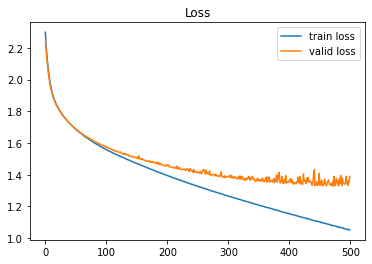

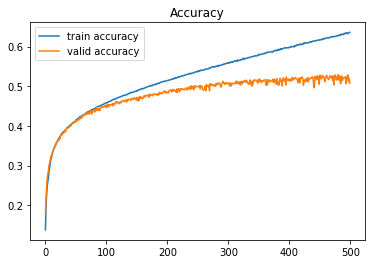

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()